In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split  
import keras
import keras.utils
from keras.datasets import mnist
# from keras import utils as np_utils
from tensorflow.keras import utils as np_utils
from keras.utils import to_categorical

2022-11-29 10:55:58.808086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 10:55:58.951235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 10:55:58.951261: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 10:55:58.978796: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-29 10:55:59.568386: W tensorflow/stream_executor/platform/de

In [2]:
np.random.seed(42)

In [3]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [5]:
print(df.shape)
print(df.isnull().sum())

(569, 30)
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [6]:
X = df
y = pd.Series(cancer.target)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)

In [8]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

n = of features shape(X)[1] nuber cols
m = samples size shape(X)[0] number of rows

### def initial_theta(a,bias=1.0):
  #initial it by 0
    th = list(map(lambda x: 0.0, range(a)))
    return np.array(th)

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
def hypothesis(x, t):
    z = np.matmul(x, t)
    return sigmoid(z)
implementing log reg functions

In [15]:
def initial_theta(a,bias=1.0):
  #initial it by 0
    th = list(map(lambda x: 0.0, range(a)))
    return np.array(th)

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
def hypothesis(x, t):
    z = np.matmul(x, t)
    return sigmoid(z)


In [18]:
theta = initial_theta(len(X_train[0]))
hypthesis = hypothesis(X_train,theta)

The formula gives the cost function for the logistic regression.
Where hx = is the sigmoid function we used earlier.


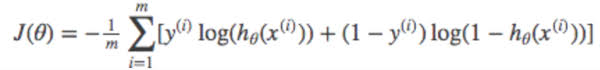

In [16]:
def cost_function(x, y, t,m):
    h = hypothesis(x, t)
    left_cost = -y * np.log(h)
    right_cost = (1.0-y) * np.log(1.0-h)
    cost = left_cost - right_cost
    cost = cost.sum() / m
    return cost

# Step 5: Fitting the Algorithm using Gradient Descent 

Gradient descent is an optimization algorithm that is responsible for the learning of best-fitting parameters. So what are the gradients? The gradients are the vector of the 1st order derivative of the cost function. These are the direction of the steepest ascent or maximum of a function. For gradient descent, we move in the opposite direction of the gradients. We will be updating the weights in every iteration until the convergence.

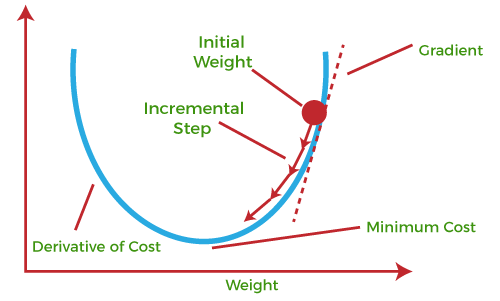

In [23]:
def update_weights_GD(x, y, t, lr, m):
    h = hypothesis(x, t)
    gradient = np.matmul(x.T,h - y)
    gradient /= m
    gradient *= lr
    t -= gradient
    return t

def train(x, y, t, lr, iters,m):
    cost_history = []
    for i in range(iters):
        t = update_weights_GD(x, y, t, lr,m)
        cost = cost_function(x, y, t,m)
    return t

In [32]:
m,n = X_train.shape
first_cost = cost_function(X_train,y_train,theta,m)
newt= train(X_train,y_train,theta,0.01, 10000,m)

/tmp/ipykernel_26605/2420616136.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))
/tmp/ipykernel_26605/3459852782.py:3: RuntimeWarning: divide by zero encountered in log
  left_cost = -y * np.log(h)
/tmp/ipykernel_26605/3459852782.py:3: RuntimeWarning: invalid value encountered in multiply
  left_cost = -y * np.log(h)
/tmp/ipykernel_26605/3459852782.py:4: RuntimeWarning: divide by zero encountered in log
  right_cost = (1.0-y) * np.log(1.0-h)
/tmp/ipykernel_26605/3459852782.py:4: RuntimeWarning: invalid value encountered in multiply
  right_cost = (1.0-y) * np.log(1.0-h)


In [34]:
newt

array([ 1.37348604e+01, -9.00917105e+00,  4.66904861e+01,  2.53547575e+00,
       -1.25138942e-01, -1.08007433e+00, -1.61203376e+00, -6.32704485e-01,
       -2.07692368e-01, -2.12549584e-02,  2.80588643e-01,  5.55368852e-01,
       -3.34523156e+00, -1.07897382e+01, -2.28697868e-02, -2.61738184e-01,
       -3.63506892e-01, -8.22279749e-02, -6.17514181e-02, -1.92954421e-02,
        1.42860898e+01, -2.94846647e+01,  1.40998585e+01, -7.35247397e+00,
       -3.15094964e-01, -3.70065515e+00, -4.70377620e+00, -1.21336935e+00,
       -9.28026198e-01, -2.86107307e-01])

the alpha is the step size responsible for how quick it converges to the global minimum. If the step size is too small, it will converge slowly, but if it is too large, it may overshoot the minimum while descending.
By differentiating the cost function, we get the gradient descent expression

# Step 6: Prediction

image.png

In [27]:
def predict(X_test,theta):
  y_pred=[]
  for x in X_test:
    y_pred.append(int(hypothesis(x, theta)))
  return y_pred

def accuracy(preds,test):
  acc=0
  for i,j in zip(preds,test):
    if i==j:
      acc+=1
    else:
      continue
  return acc/len(test)

In [35]:
y_preds=predict(X_test,newt)


/tmp/ipykernel_26605/2420616136.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1 + np.exp(-z))


In [36]:
print('Accuracy: ',accuracy(y_preds,y_test))

Accuracy:  0.9385964912280702



Confusion Matrix


Text(50.722222222222214, 0.5, 'True')

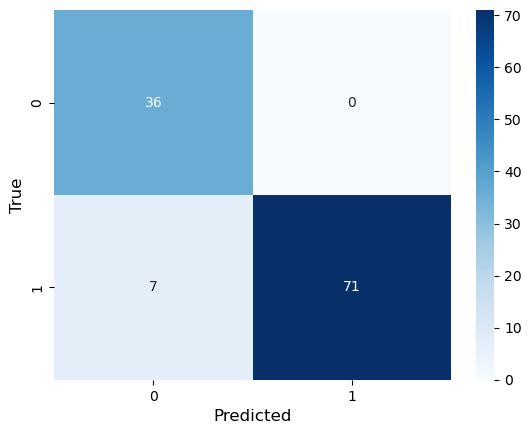

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_preds, y_test)
print("\nConfusion Matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)